Explained variance ratio:  [0.46102367 0.16958906]
Sum of explained variance ratio:  0.6306127267691591


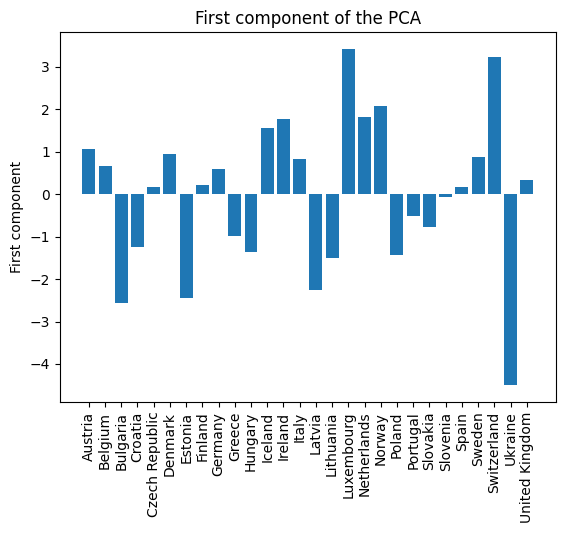

Loadings for the first component:
Area : -0.12487390183337645
GDP : 0.5005058583604995
Inflation : -0.40651815481188946
Life.expect : 0.48287332530020083
Military : -0.1881116161317976
Pop.growth : 0.47570355391275776
Unemployment : -0.27165582007504635


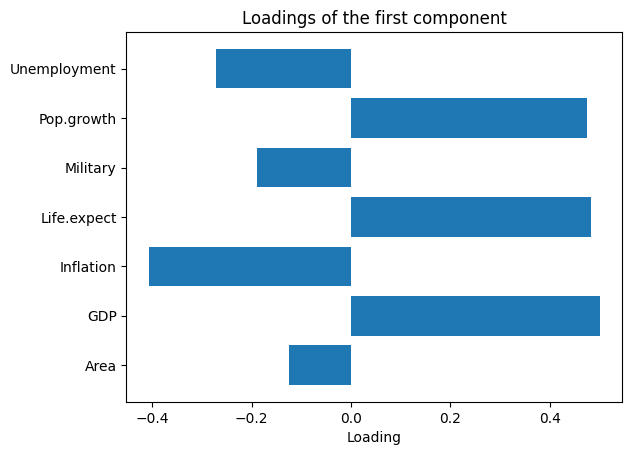

In [8]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
full_data = pd.read_csv("../data/europe.csv")

# Remove the 'Country' column
data = full_data.drop(columns=["Country"])

# Standardize the data
data = (data - data.mean()) / data.std()

# Create the PCA object
pca = PCA(n_components=2)

# Apply the PCA to the data
pca.fit(data)

# Get the principal components
components = pca.transform(data)

# Get the explained variance ratio (this will sum to 1 across all components)
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print("Explained variance ratio: ", explained_variance_ratio)
print("Sum of explained variance ratio: ", np.sum(explained_variance_ratio))

# Plot each country with the value of the first component
plt.bar(full_data["Country"], components[:, 0])
plt.xticks(rotation=90)
plt.ylabel("First component")
plt.title("First component of the PCA")
plt.show()

# Print the loadings for the first component
loadings = pca.components_[0]
features = data.columns

print("Loadings for the first component:")
for i in range(len(features)):
    print(features[i], ":", loadings[i])

# Show the loadings in a horizontal bar plot
plt.barh(features, loadings)
plt.xlabel("Loading")
plt.title("Loadings of the first component")
plt.show()


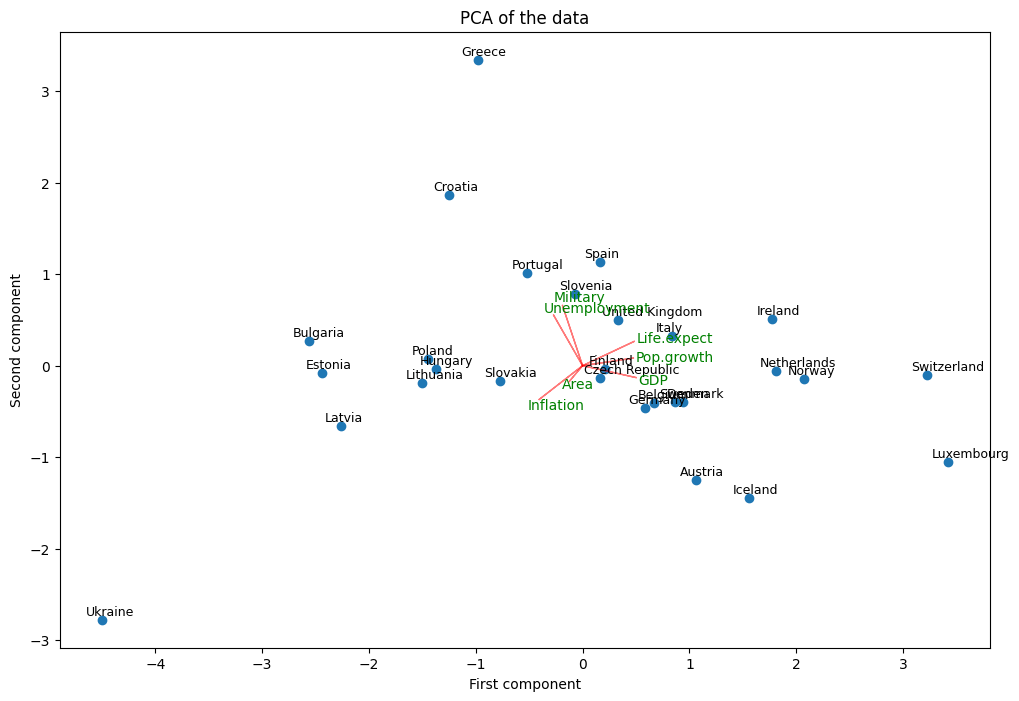

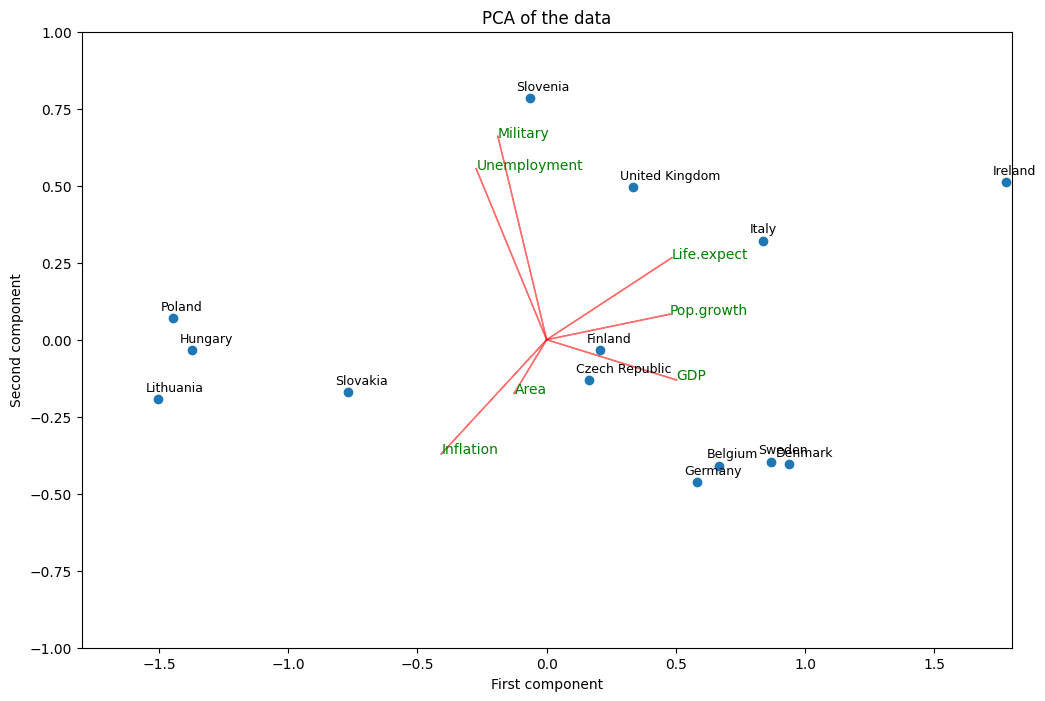

In [6]:
import matplotlib.pyplot as plt

# now we make the biplot for the first two components
# we plot the data

plt.figure(figsize=(12, 8))  # Increase the figure size

plt.scatter(components[:, 0], components[:, 1])
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("PCA of the data")

# Add country names to the dots
countries = full_data.iloc[:, 0].values  # Assuming the first column contains country names
for i in range(len(countries)):
    plt.text(components[i, 0] - 0.15, components[i, 1] + 0.05, countries[i], fontsize=9)

# we plot the loadings
for i in range(len(features)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*1.15 - 0.05, pca.components_[1, i]*1.15 - 0.05, features[i], color='g')

plt.show()

# we zoom in the plot
# Filter the data to include only points within the specified limits
x1, x2, y1, y2 = -1.8, 1.8, -1, 1
filtered_indices = (components[:, 0] >= x1) & (components[:, 0] <= x2) & (components[:, 1] >= y1) & (components[:, 1] <= y2)
filtered_components = components[filtered_indices]
filtered_countries = full_data.iloc[filtered_indices, 0].values  # Assuming the first column contains country names

plt.figure(figsize=(12, 8))  # Increase the figure size

plt.scatter(filtered_components[:, 0], filtered_components[:, 1])
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("PCA of the data")

# Add country names to the dots
for i in range(len(filtered_countries)):
    plt.text(filtered_components[i, 0] - 0.05, filtered_components[i, 1] + 0.025, filtered_countries[i], fontsize=9)

# We plot the loadings
for i in range(len(features)):
    if x1 <= pca.components_[0, i] <= x2 and y1 <= pca.components_[1, i] <= y2:
        plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
        plt.text(pca.components_[0, i], pca.components_[1, i], features[i], color='g')

# Set the x and y limits
plt.xlim(x1, x2)
plt.ylim(y1, y2)

plt.show()

